In [1]:
import csv
import cv2
import numpy as np

def read_csv(root_path):
    with open(root_path + 'driving_log.csv', 'r') as f:
        reader = csv.reader(f)
        for line in reader:
            yield line

def make_local_path(path, local_root):
    basename = path.split('/')[-1]
    return local_root + 'IMG/' + basename

def load_image(local_path):
    return cv2.imread(local_path)

def extract_images(csv_line, local_root):
    paths = csv_line[0:3]
    return [load_image(make_local_path(p, local_root)) for p in paths]

def extract_measurements(csv_line):
    return float(csv_line[3])

In [2]:
images = []
measurements = []

forward_img = './data/forward/'
reverse_img = './data/reverse/'

print("Reading forward images...\n")
for line in read_csv(forward_img):
    images.append(extract_images(line, forward_img)[0])
    measurements.append(extract_measurements(line))

print("Reading reverse images...\n")
for line in read_csv(reverse_img):
    images.append(extract_images(line, reverse_img)[0])
    measurements.append(extract_measurements(line))

X_train = np.array(images)
y_train = np.array(measurements)

print("Training set shape: ", X_train.shape)
print("Labels shape: ", y_train.shape)


Reading forward images...

Reading reverse images...

Training set shape:  (15911, 160, 320, 3)
Labels shape:  (15911,)


In [26]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Convolution2D, MaxPooling2D

image_shape = X_train.shape[1:]

model = Sequential()
model.add(Convolution2D(6, kernel_size=(5, 5), padding='valid', activation='relu', input_shape=image_shape))
model.add(MaxPooling2D(pool_size=2, padding='valid'))
model.add(Convolution2D(16, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='valid'))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mse', optimizer='adam')
hsitory = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, verbose=2, batch_size=128)

model.save('model.h5')

Train on 12728 samples, validate on 3183 samples
Epoch 1/10
32s - loss: 12784.7800 - val_loss: 4.8767
Epoch 2/10
32s - loss: 3.5255 - val_loss: 3.7458
Epoch 3/10
32s - loss: 2.7494 - val_loss: 3.5663
Epoch 4/10
32s - loss: 2.2189 - val_loss: 3.3368
Epoch 5/10
32s - loss: 1.8775 - val_loss: 3.2613
Epoch 6/10
32s - loss: 1.6205 - val_loss: 3.1856
Epoch 7/10
32s - loss: 1.3787 - val_loss: 3.2060
Epoch 8/10


In [17]:
dir(hsitory)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [18]:
hsitory.history

{'loss': [73.392804739384488,
  0.061742319696770756,
  0.054248671892077424,
  0.050921940507565107,
  0.048344383424816458,
  0.046701452333660416,
  0.045484262562487429,
  0.044397451819431701,
  0.043593925178650413,
  0.042129485907137283],
 'val_loss': [0.069505910310125318,
  0.069512187287344845,
  0.064869238534182111,
  0.064420352229088346,
  0.066191142833693067,
  0.070269243286684407,
  0.070607907676842843,
  0.074168473699235737,
  0.076674906515870084,
  0.076653907165642882]}

In [20]:
loss = hsitory.history['loss']
val_loss = hsitory.history['val_loss']

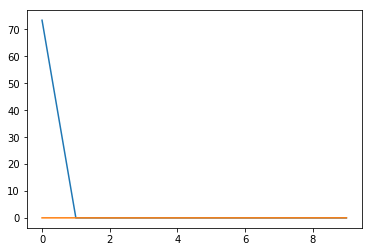

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(10), loss)
plt.plot(range(10), val_loss)